In [2]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
terms = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/miRNA_signal_hsa_number2.xlsx", engine='openpyxl', sheet_name='Sheet2')
display(terms)
df1 = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/miRNA_signal_hsa_number2.xlsx", engine='openpyxl', sheet_name='Sheet1')
display(df1)
df2 = pd.read_excel("/home/gddaslab/mxp140/sclerosis_project/ancova_adjusted_adult_data2.xlsx", engine='openpyxl')
display(df2)

,Acronym,Meaning,Number of patients
0,pHC,pediatric healthy control,10
1,aHC,adult healthy control (Normal Donor ND),5
2,sMS,adult stable MS,4
3,aMS,adult active MS,5
4,aPOMS,active peds MS,8
5,sPOMS,stable peds MS,3
6,pBar,pediatric bariatric,6


,ID,Transcript_ID,pHC1,pHC2,pHC3,pHC4,pHC5,pHC6,pHC7,pHC8,...,aPOMS9,sPOMS1,sPOMS2,sPOMS3,pBar2,pBar3,pBar5,pBar7,pBar8,pBar9
0,20500717,hsa-miR-1,1.81,2.27,1.75,2.49,1.93,1.63,1.83,1.69,...,1.51,1.87,1.55,1.89,2.37,1.89,1.98,1.98,1.99,1.44
1,20534748,hsa-mir-1-1,1.73,1.60,1.80,2.27,1.60,1.92,1.67,1.74,...,2.06,2.20,2.36,1.91,2.24,1.79,1.70,1.90,1.84,2.24
2,20534749,hsa-mir-1-1,1.62,1.53,1.81,2.16,1.62,2.00,1.63,1.74,...,1.83,2.04,1.94,1.94,1.87,1.70,1.60,1.79,1.73,2.07
3,20534568,hsa-mir-1-2,1.60,1.72,2.09,2.29,1.89,2.00,1.70,2.17,...,1.86,1.67,1.93,2.03,2.05,1.68,2.03,1.77,1.90,1.97
4,20534569,hsa-mir-1-2,1.60,1.94,2.09,2.29,2.08,1.91,1.88,2.17,...,1.85,1.67,2.01,2.03,2.02,1.68,2.03,2.04,1.89,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,20500182,hsa-miR-99a-3p,2.08,1.48,1.70,1.77,1.73,1.93,2.09,1.71,...,1.63,1.51,1.75,2.11,1.92,2.01,1.79,1.59,1.71,1.84
4566,20500181,hsa-miR-99a-5p,2.19,2.05,2.03,1.86,2.12,2.38,2.30,1.81,...,1.89,1.52,1.52,1.88,1.48,1.93,1.45,1.90,1.86,2.10
4567,20534825,hsa-mir-99b,1.99,1.53,2.35,2.05,1.73,1.98,2.29,1.97,...,2.08,2.57,2.28,3.17,1.64,1.96,2.27,1.79,1.94,1.89
4568,20501177,hsa-miR-99b-3p,2.37,2.09,1.92,1.71,1.55,1.33,1.60,1.61,...,2.49,2.63,2.28,2.19,1.62,1.68,1.96,1.95,1.87,2.08


,Unnamed: 0,sMS1,sMS2,sMS4,sMS5,aMS1,aMS2,aMS3,aMS4,aMS5,aND1,aND2,aND3,aND4,aND5
0,hsa-mir-124-1,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
1,hsa-mir-124-2,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
2,hsa-mir-124-3,0.813547,0.300343,0.293471,0.225105,0.533394,0.724991,0.268452,0.855029,0.611683,0.501721,0.855400,0.718413,0.623509,0.765144
3,hsa-mir-6742,0.847233,1.067314,1.542275,1.331042,1.187316,0.908604,0.743535,1.206083,0.903590,1.121069,1.083533,1.026056,0.999754,1.088521
4,hsa-miR-370-5p,0.946431,1.131797,0.920476,0.737162,1.124521,1.193229,1.056487,0.931207,1.231881,1.219858,1.063763,1.008510,1.618453,1.185139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,hsa-miR-5196-5p,4.546187,4.539880,4.770658,3.757521,4.695129,4.354227,3.896776,4.091992,3.582737,4.180501,3.731527,4.169011,3.768422,3.815285
1191,hsa-miR-1247-3p,4.741667,4.560000,5.001667,3.341667,4.561667,3.991667,3.861667,3.961667,4.081667,4.471667,3.510000,4.151667,2.931667,3.321667
1192,hsa-miR-4530,5.202500,4.770000,3.662500,3.202500,4.682500,3.892500,4.972500,4.502500,4.042500,4.112500,3.410000,4.092500,2.842500,3.872500
1193,hsa-miR-4688,5.278046,4.428851,4.572746,4.124704,4.777446,4.381754,4.523921,5.129404,4.950187,5.727837,5.345327,5.826271,4.580396,4.772354


In [68]:
data.columns

Index(['aHC1', 'aHC2', 'aHC3', 'aHC4', 'aHC5', 'sMS1', 'sMS2', 'sMS4', 'sMS5',
       'aMS1', 'aMS2', 'aMS3', 'aMS4', 'aMS5', 'aPOMS1', 'aPOMS2', 'aPOMS3',
       'aPOMS4', 'aPOMS5', 'aPOMS6', 'aPOMS7', 'aPOMS9', 'sPOMS1', 'sPOMS2',
       'sPOMS3', 'pBar2', 'pBar3', 'pBar5', 'pBar7', 'pBar8', 'pBar9'],
      dtype='object')

In [74]:
df1.columns[12:27]

Index(['aHC1', 'aHC2', 'aHC3', 'aHC4', 'aHC5', 'sMS1', 'sMS2', 'sMS4', 'sMS5',
       'aMS1', 'aMS2', 'aMS3', 'aMS4', 'aMS5', 'aPOMS1'],
      dtype='object')

In [82]:
data = df1.iloc[:, 12:26]
data

,aHC1,aHC2,aHC3,aHC4,aHC5,sMS1,sMS2,sMS4,sMS5,aMS1,aMS2,aMS3,aMS4,aMS5
0,1.76,1.81,2.08,1.58,1.92,2.26,1.48,1.84,1.88,1.64,1.94,1.61,2.33,1.49
1,1.90,1.98,2.01,2.10,1.92,1.72,2.08,1.78,1.92,1.92,2.14,2.00,1.84,1.88
2,1.79,1.83,1.81,1.72,2.17,1.77,1.93,1.67,1.81,1.81,1.97,2.17,1.76,1.73
3,1.58,2.04,2.17,2.09,2.11,1.88,2.09,2.47,1.96,2.00,1.92,2.17,2.12,2.15
4,1.66,1.85,1.96,2.09,2.08,1.88,1.96,2.47,2.01,2.04,1.87,2.17,2.12,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,1.71,1.64,1.62,1.51,1.67,1.88,1.78,1.99,1.46,1.47,1.86,1.66,1.59,1.72
4566,1.73,1.71,1.64,1.87,1.84,1.57,1.69,1.57,1.62,1.44,1.41,1.84,1.39,1.67
4567,2.11,2.25,2.10,2.14,1.80,2.54,2.07,2.44,2.11,2.01,2.14,2.02,2.52,2.26
4568,2.30,2.10,2.30,2.63,2.02,2.03,2.33,2.15,1.87,2.31,2.05,1.66,2.03,2.23


In [83]:
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
color_array = np.concatenate([[color]*terms['Number of patients'].values[i+1] for i, color in enumerate(color_palette)], dtype='str')
color_array

array(['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue',
       'green', 'green', 'green', 'green', 'green', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'purple', 'purple', 'purple', 'cyan', 'cyan', 'cyan', 'cyan',
       'cyan', 'cyan'], dtype='<U6')

In [84]:
X = data.T.values
display(f'X:{X}')
display(f'Shape:{X.shape}')

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Available device:', device)

# Convert to PyTorch tensor and move to GPU if available
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

# Perform PCA using torch.pca_lowrank
U, S, V = torch.pca_lowrank(X_tensor)

# Calculate explained variance
explained_variance = S**2 / torch.sum(S**2)
cumulative_explained_variance = torch.cumsum(explained_variance, dim=0)

'X:[[1.76 1.9  1.79 ... 2.11 2.3  3.15]\n [1.81 1.98 1.83 ... 2.25 2.1  2.52]\n [2.08 2.01 1.81 ... 2.1  2.3  3.18]\n ...\n [1.61 2.   2.17 ... 2.02 1.66 2.5 ]\n [2.33 1.84 1.76 ... 2.52 2.03 2.73]\n [1.49 1.88 1.73 ... 2.26 2.23 2.31]]'

'Shape:(14, 4570)'

Available device: cuda


In [85]:
explained_variance

tensor([0.2646, 0.1684, 0.1512, 0.1428, 0.1409, 0.1321], device='cuda:0')

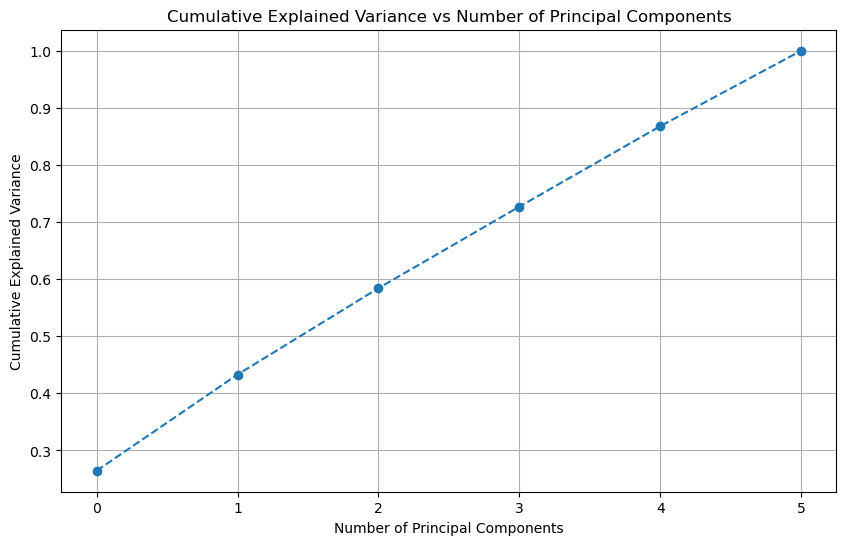

Number of principal components to retain 95% variance: 6


In [86]:
# Plot the cumulative explained variance
cumulative_explained_variance_cpu = cumulative_explained_variance.cpu().numpy()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance_cpu, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to keep (e.g., explaining 95% of the variance)
threshold = 0.95
num_components = (cumulative_explained_variance >= threshold).nonzero(as_tuple=True)[0].min().item() + 1
print(f'Number of principal components to retain 95% variance: {num_components}')

In [87]:
V

tensor([[ 0.0009,  0.0085, -0.0081,  0.0004, -0.0062,  0.0200],
        [ 0.0018,  0.0018, -0.0125,  0.0169, -0.0045, -0.0150],
        [-0.0046, -0.0047, -0.0278, -0.0107,  0.0174,  0.0022],
        ...,
        [-0.0047,  0.0016,  0.0091,  0.0044, -0.0222,  0.0133],
        [-0.0064,  0.0219,  0.0176,  0.0062, -0.0058, -0.0184],
        [-0.0213, -0.0159,  0.0027,  0.0026,  0.0096,  0.0144]],
       device='cuda:0')

In [88]:
# Project the data onto the principal components
PC = torch.matmul(X_tensor, V[:, :num_components])
PC

tensor([[-15.8167, -14.3492,   3.8646, -18.6777,   2.4160,  21.7962],
        [-18.4146, -16.1129,  12.7267,  33.8363, -14.9879,   3.7272],
        [-10.2051,  13.3855,   0.2050,  13.3693,  15.8832,  -6.0910],
        [ 31.3221,  44.1714,   1.0507,  22.8529,   6.9011,  -4.0319],
        [  7.7809,  16.8851,  -6.5172, -28.7118,  20.2331,   9.6765],
        [-13.6470,  22.4942,  -5.0360, -17.8399,  -5.9437, -14.7318],
        [-24.9315, -18.7883, -17.8430, -15.1078,  -3.6174, -39.5115],
        [ -3.9466, -14.7094,  45.1401,  -7.3817,  22.6672,  11.7367],
        [ 73.9110, -31.5020,  -2.9697,  -2.6151,  -2.8278, -11.9645],
        [-16.8602,  -4.8179,  11.0402,  20.5362,   8.2024, -21.5806],
        [  1.4500,   6.5754,   5.8771,  -4.3442, -29.0444,   6.7825],
        [ -7.0140,  -9.5337, -31.9946,   8.1801,  28.6293,  13.6780],
        [ -4.7824,  -7.0665, -28.7348,  11.7284, -19.3849,  28.0052],
        [  1.1540,  13.3684,  13.1910, -15.8248, -29.1262,   2.5090]],
       device='cuda

In [89]:
data.columns

Index(['aHC1', 'aHC2', 'aHC3', 'aHC4', 'aHC5', 'sMS1', 'sMS2', 'sMS4', 'sMS5',
       'aMS1', 'aMS2', 'aMS3', 'aMS4', 'aMS5'],
      dtype='object')

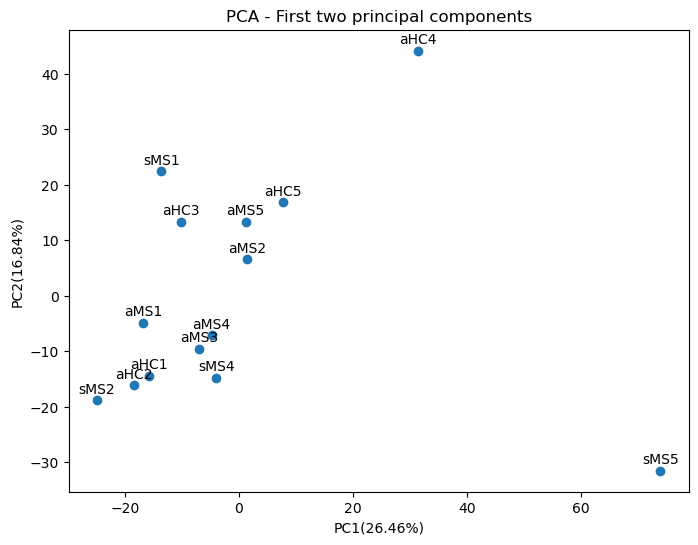

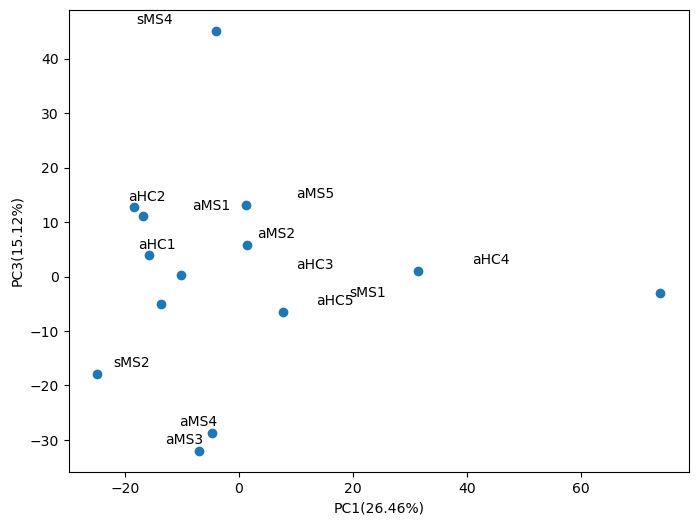

In [92]:
# Get the first two principal components
from matplotlib import colors

pc1 = PC[:, 0].cpu().numpy()  # Convert to numpy array and move to CPU
pc2 = PC[:, 1].cpu().numpy()  # Convert to numpy array and move to CPU
pc3 = PC[:, 2].cpu().numpy()  # Convert to numpy array and move to CPU

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2,) #color=color_array)
explained_variance_cpu = explained_variance.cpu().numpy()
plt.xlabel(f'PC1({(explained_variance_cpu[0]*100):.2f}%)')
plt.ylabel(f'PC2({(explained_variance_cpu[1]*100):.2f}%)')
plt.title('PCA - First two principal components')
#plt.grid(True)
# Annotate each point
annotations = list(data.columns)
for i, label in enumerate(annotations):
    plt.annotate(label, (pc1[i], pc2[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc3,)# color=color_array)
explained_variance_cpu = explained_variance.cpu().numpy()
plt.xlabel(f'PC1({(explained_variance_cpu[0]*100):.2f}%)')
plt.ylabel(f'PC3({(explained_variance_cpu[2]*100):.2f}%)')
#plt.grid(True)
# Annotate each point
annotations = list(data.columns)
for i, label in enumerate(annotations):
    plt.annotate(label, (pc2[i], pc3[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [36]:
V

tensor([[-0.0086,  0.0043,  0.0154, -0.0021,  0.0095, -0.0149],
        [ 0.0139,  0.0186, -0.0027, -0.0123, -0.0176, -0.0099],
        [ 0.0120,  0.0052,  0.0144, -0.0196, -0.0288, -0.0085],
        ...,
        [ 0.0131, -0.0134,  0.0154,  0.0158, -0.0060, -0.0062],
        [ 0.0188, -0.0052, -0.0135,  0.0035,  0.0103,  0.0013],
        [ 0.0101, -0.0203, -0.0006, -0.0187,  0.0096,  0.0020]],
       device='cuda:0')

In [37]:
V[:, :2]

tensor([[-0.0086,  0.0043],
        [ 0.0139,  0.0186],
        [ 0.0120,  0.0052],
        ...,
        [ 0.0131, -0.0134],
        [ 0.0188, -0.0052],
        [ 0.0101, -0.0203]], device='cuda:0')

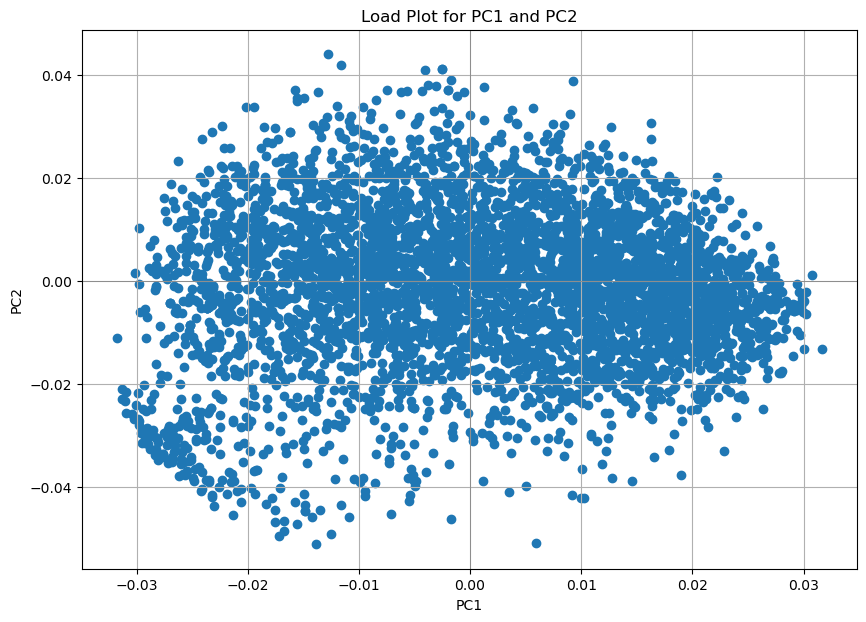

In [38]:
# Loadings are the principal axes in feature space, which are the rows of V
loadings = V[:, :2].cpu().numpy()

# Plotting
plt.figure(figsize=(10, 7))

# Plot PC1 vs PC2 loadings
plt.scatter(loadings[:, 0], loadings[:, 1])

# Annotate each point with the feature name (assuming you have feature names)
features = [f'Feature {i+1}' for i in range(X.shape[1])]
# for i, feature in enumerate(features):
#     plt.annotate(feature, (loadings[i, 0], loadings[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Load Plot for PC1 and PC2')
plt.grid()
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()


In [40]:
# Identify top n feature contributions to prinicipal components
# Create a DataFrame for easier handling
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
#display(loadings_df)
# Find top 10 contributing features for each principal component
top_features = {}
for pc in loadings_df.columns:
    top_features[pc] = loadings_df[pc].abs().nlargest(10).index

# Convert indices to feature names
top_feature_names = {pc: [df1.iloc[:, 1][i] for i in top_features[pc]] for pc in top_features}

top_feature_df = pd.DataFrame(top_feature_names)
display(top_feature_df)

,PC1,PC2
0,hsa-miR-378h,hsa-miR-6749-5p
1,hsa-mir-4492,hsa-miR-328-5p
2,hsa-miR-4529-3p,hsa-miR-6090
3,hsa-mir-6880,hsa-miR-8072
4,hsa-miR-2115-5p,hsa-miR-3960
5,hsa-miR-6869-5p,hsa-miR-4497
6,hsa-miR-6806-3p,hsa-miR-1915-3p
7,hsa-miR-466,hsa-miR-6087
8,hsa-miR-16-5p,hsa-miR-6794-5p
9,hsa-miR-3177-3p,hsa-miR-4270


# K-means clustering of the 1st two principal components

In [41]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters = 7, random_state = 2)
kmeans.fit(PC[:, :2].cpu().numpy())

KMeans(n_clusters=7, random_state=2)

In [46]:
cluster_centers = kmeans.cluster_centers_
print(f'Cluster centers:\n{cluster_centers}')
cluster_labels = kmeans.labels_
print(f'Cluster labels:\n{cluster_labels}')

Cluster centers:
[[ 19.556099    1.7283425]
 [-45.86155   -13.673969 ]
 [ -4.0741086  23.216803 ]
 [ 25.685225   -8.002789 ]
 [  9.435125    3.4904416]
 [-21.494907   41.377987 ]
 [-45.93598    21.928219 ]]
Cluster labels:
[1 1 1 1 1 1 1 1 1 6 3 3 3 2 4 3 3 0 2 3 4 0 0 0 3 3 0 4 3 3 0 0 3 3 3 5 5
 4 4 2 2]


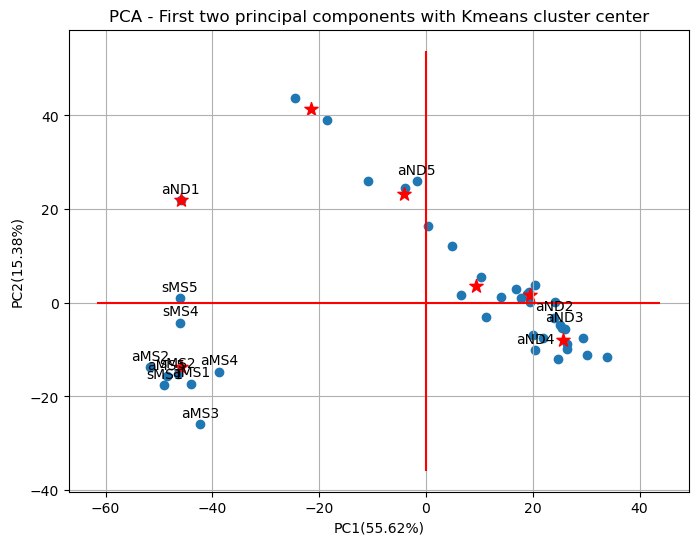

In [47]:
# Get the first two principal components
pc1 = PC[:, 0].cpu().numpy()  # Convert to numpy array and move to CPU
pc2 = PC[:, 1].cpu().numpy()  # Convert to numpy array and move to CPU

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2,)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, color='red')
plt.vlines(x=0, ymin=min(pc2)-10, ymax=max(pc2)+10, color='red')
plt.hlines(y=0, xmin=min(pc1)-10, xmax=max(pc1)+10, color='red')
explained_variance_cpu = explained_variance.cpu().numpy()
plt.xlabel(f'PC1({(explained_variance_cpu[0]*100):.2f}%)')
plt.ylabel(f'PC2({(explained_variance_cpu[1]*100):.2f}%)')
plt.title('PCA - First two principal components with Kmeans cluster center')
plt.grid(True)
# Annotate each point
annotations = list(df2.columns[1:])
for i, label in enumerate(annotations):
    plt.annotate(label, (pc1[i], pc2[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()